In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('sales_dataset.csv', parse_dates=True)
df = df.dropna()        # drops null values

df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15402 entries, 0 to 15401
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Date     15402 non-null  object
 1   Customer Name  15402 non-null  object
 2   Category       15402 non-null  object
 3   Quantity       15402 non-null  int64 
 4   Expiry Date    15402 non-null  object
 5   City           15402 non-null  object
 6   Region         15402 non-null  object
dtypes: int64(1), object(6)
memory usage: 842.4+ KB


(None,
    Order Date        Customer Name            Category  Quantity Expiry Date  \
 0  01-01-2015  Meera Krishnamurthy       Breads & Buns       151  03-01-2015   
 1  01-01-2015          Priya Patel  Organic Vegetables        69  06-01-2015   
 2  01-01-2015         Lakshmi Nair                Fish        38  02-01-2015   
 3  01-01-2015           Amit Kumar              Mutton        38  02-01-2015   
 4  01-01-2015          Nitin Hegde             Chicken       189  02-01-2015   
 
         City   Region  
 0    Lucknow  Central  
 1     Jhansi     West  
 2  Chitrakut    South  
 3   Mirzapur    South  
 4  Prayagraj    South  )

In [ ]:
# prompt: find number of unique values in column 'category' and 'city'

print("Number of unique values in 'category' column:", df['Category'].nunique())
print("Number of unique values in 'city' column:", df['City'].nunique())

Number of unique values in 'category' column: 11
Number of unique values in 'city' column: 12


In [ ]:
df.drop(columns=['Customer Name','Expiry Date','Region'],inplace=True)
future_df = df

In [ ]:
df.head()

,Order Date,Category,Quantity,City
0,01-01-2015,Breads & Buns,151,Lucknow
1,01-01-2015,Organic Vegetables,69,Jhansi
2,01-01-2015,Fish,38,Chitrakut
3,01-01-2015,Mutton,38,Mirzapur
4,01-01-2015,Chicken,189,Prayagraj


<ipython-input-5-f6b068df0b81>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_demand = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Quantity'].sum()


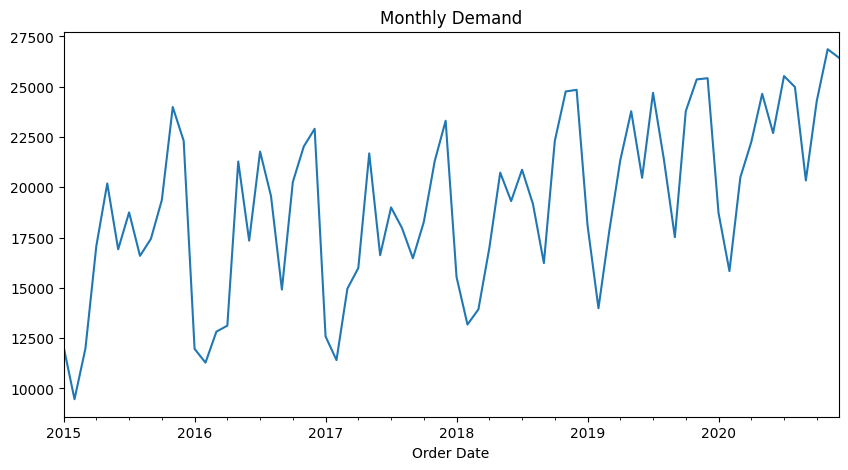

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Order Date' (Object) to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')
# Resample using pd.Grouper
monthly_demand = df.groupby(pd.Grouper(key='Order Date', freq='M'))['Quantity'].sum()

# Plot
monthly_demand.plot(title='Monthly Demand', figsize=(10, 5))
plt.show()

In [ ]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Quantity']),
                                                 df['Quantity'],
                                                 test_size=0.2,
                                                random_state=42)

In [ ]:
X_train.head(2)

,Order Date,Category,City
1208,2015-06-22,Organic Staples,Rae Bareilly
5860,2017-04-07,Organic Vegetables,Agra


In [ ]:
y_train.head()

,Quantity
1208,66
5860,93
424,42
554,35
2992,67


In [ ]:
df.isnull().sum()

,0
Order Date,0
Category,0
Quantity,0
City,0


In [ ]:
# one hot encoding category and city

# One-hot encoding for Category and City
ohe_category = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_city = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform training data
X_train_category = ohe_category.fit_transform(X_train[['Category']])
X_train_city = ohe_city.fit_transform(X_train[['City']])

# Transform test data
X_test_category = ohe_category.transform(X_test[['Category']])
X_test_city = ohe_city.transform(X_test[['City']])

In [ ]:
X_train_city

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [ ]:
X_train.head(2)

,Order Date,Category,City
1208,2015-06-22,Organic Staples,Rae Bareilly
5860,2017-04-07,Organic Vegetables,Agra


In [ ]:
import numpy as np

X_train_remaining = X_train.drop(columns=['Category', 'City'])
X_test_remaining = X_test.drop(columns=['Category', 'City'])

# Convert datetime columns to numeric features (year, month, day)
for col in X_train_remaining.select_dtypes(include=['datetime64']).columns:
    X_train_remaining[col + '_year'] = X_train_remaining[col].dt.year
    X_train_remaining[col + '_month'] = X_train_remaining[col].dt.month
    X_train_remaining[col + '_day'] = X_train_remaining[col].dt.day
    X_train_remaining = X_train_remaining.drop(columns=[col])

for col in X_test_remaining.select_dtypes(include=['datetime64']).columns:
    X_test_remaining[col + '_year'] = X_test_remaining[col].dt.year
    X_test_remaining[col + '_month'] = X_test_remaining[col].dt.month
    X_test_remaining[col + '_day'] = X_test_remaining[col].dt.day
    X_test_remaining = X_test_remaining.drop(columns=[col])

# Concatenate arrays
X_train_transformed = np.concatenate((X_train_remaining.values, X_train_category, X_train_city), axis=1)
X_test_transformed = np.concatenate((X_test_remaining.values, X_test_category, X_test_city), axis=1)


In [ ]:
X_test_transformed

array([[2.016e+03, 1.000e+00, 2.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 6.000e+00, 1.400e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.017e+03, 9.000e+00, 1.300e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.017e+03, 1.000e+00, 9.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.000e+01, 4.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.019e+03, 1.000e+01, 2.100e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [ ]:
X_test_transformed.shape

(3081, 26)

In [ ]:
y_train.head()

,Quantity
1208,66
5860,93
424,42
554,35
2992,67


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)

xgb_model.fit(X_train_transformed, y_train)

y_pred = xgb_model.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Squared Error (MSE): 572.92
Root Mean Squared Error (RMSE): 23.94
R² Score: 0.87
Mean Absolute Error (MAE): 15.28
Mean Absolute Percentage Error (MAPE): 0.21472958473827078


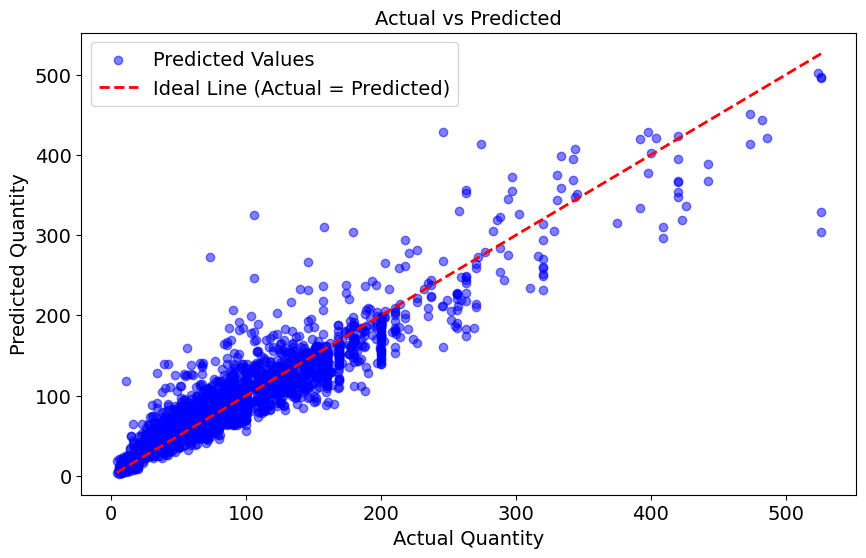

In [ ]:
#actual vs predicted: scatter plot with idle line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label='Ideal Line (Actual = Predicted)')
plt.title("Actual vs Predicted", fontsize=14)
plt.xlabel("Actual Quantity", fontsize=14)
plt.ylabel("Predicted Quantity", fontsize=14)
plt.legend(fontsize=14)  # Adjust font size for the legend
plt.xticks(fontsize=14)  # Adjust font size for x-axis tick labels
plt.yticks(fontsize=14)  # Adjust font size for y-axis tick labels
plt.show()

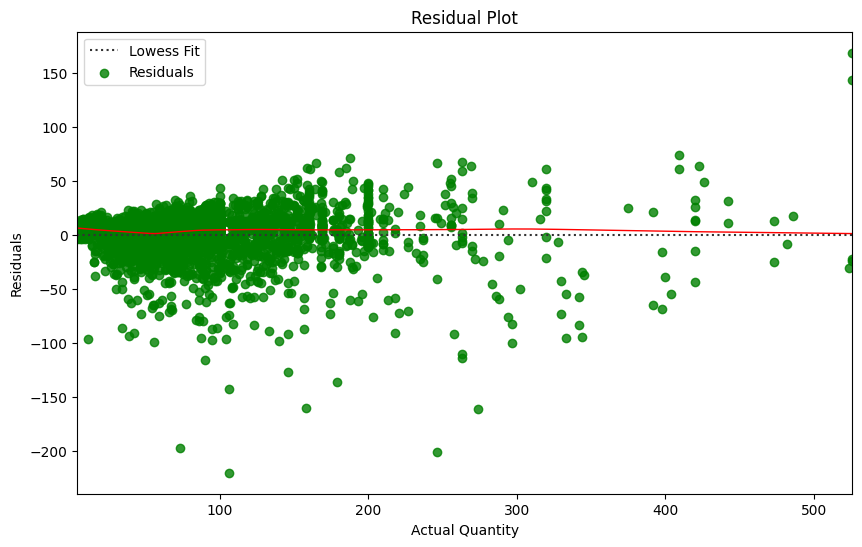

In [ ]:
# 2. Residual Plot (difference between actual and predicted)
import seaborn as sns

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=residuals, lowess=True, color='green', line_kws={'color': 'red', 'lw': 1})
plt.title("Residual Plot")
plt.xlabel("Actual Quantity")
plt.ylabel("Residuals")
plt.legend(['Lowess Fit', 'Residuals'], loc='upper left')  # Add legend to residual plot
plt.show()

<Figure size 1000x600 with 0 Axes>

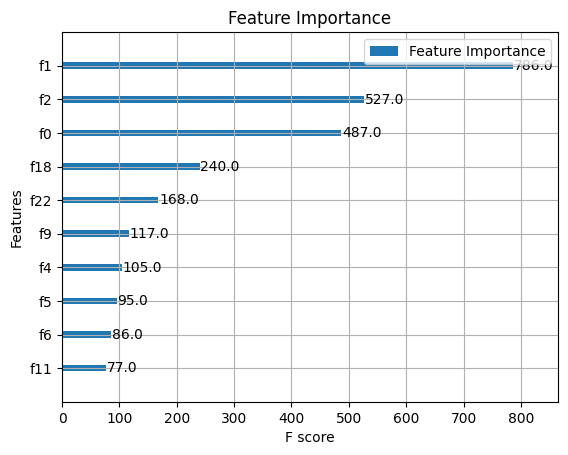

In [ ]:
import xgboost as xgb
# 3. Feature Importance Plot (XGBoost model)
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='weight')
plt.title("Feature Importance")
plt.legend(['Feature Importance'], loc='upper right')  # Add legend to feature importance plot
plt.show()

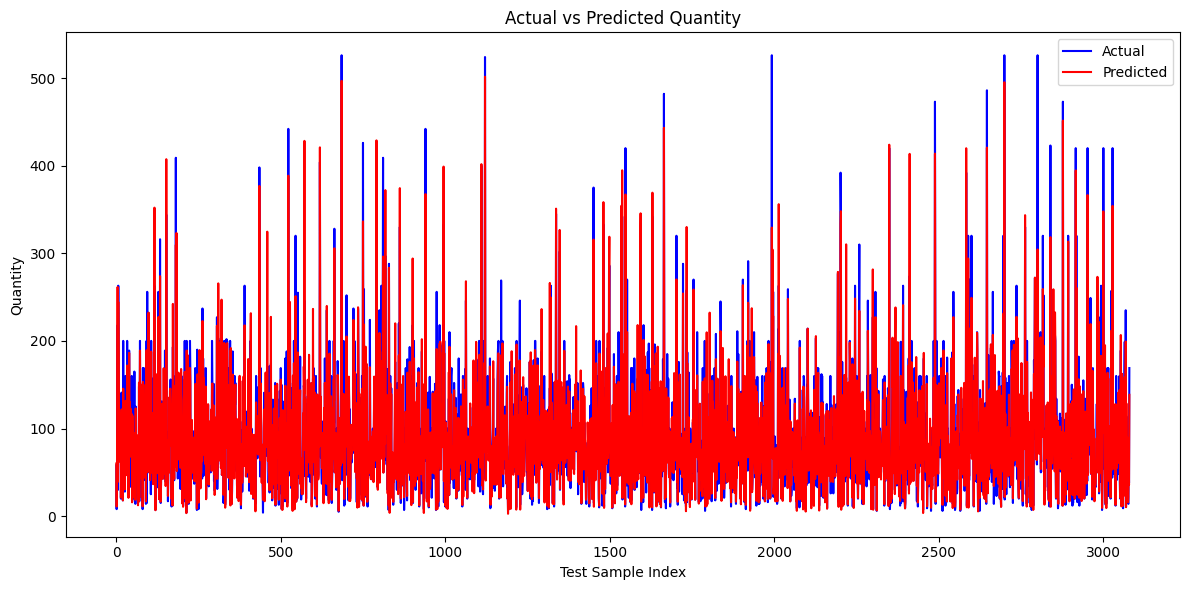

In [ ]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted
plt.figure(figsize=(12, 6))

# Plot Actual values
plt.plot(y_test.values, label='Actual', color='blue')

# Plot Predicted values
plt.plot(y_pred, label='Predicted', color='red')

# Add title and labels
plt.title('Actual vs Predicted Quantity')
plt.xlabel('Test Sample Index')
plt.ylabel('Quantity')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

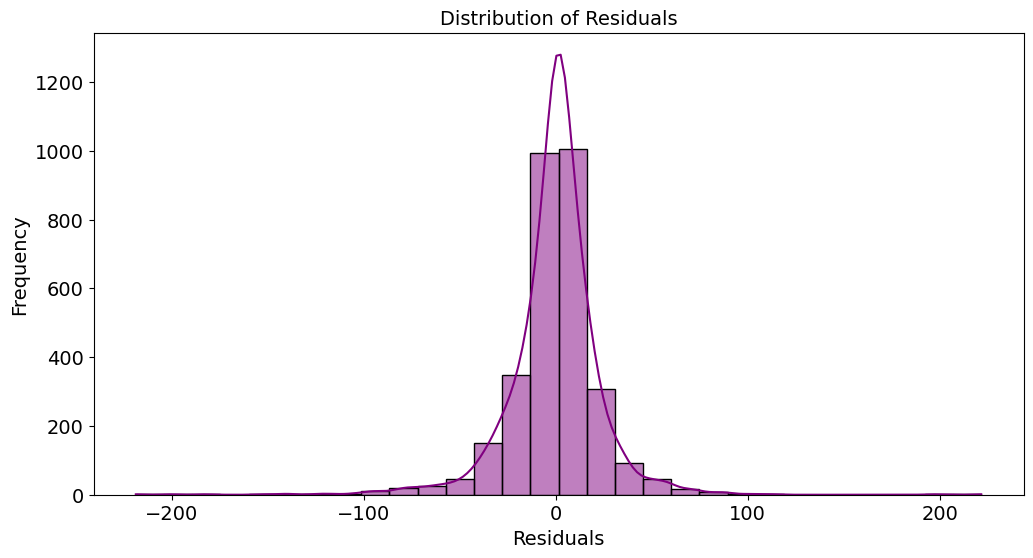

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Distribution of Residuals", fontsize=14)
plt.xlabel("Residuals", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=14)  # Adjust font size for x-axis tick labels
plt.yticks(fontsize=14)  # Adjust font size for y-axis tick labels
plt.show()


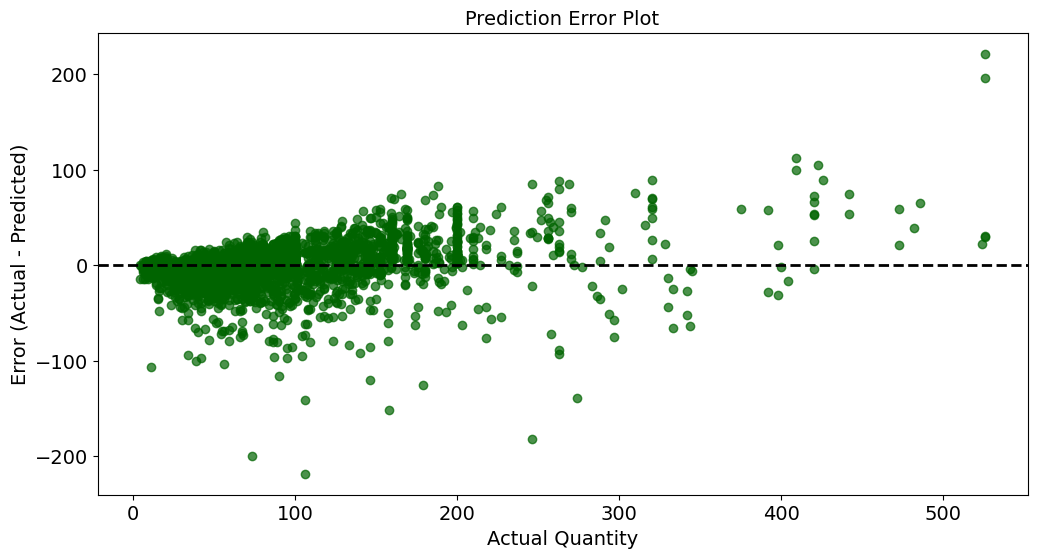

In [ ]:
error = y_test - y_pred

plt.figure(figsize=(12, 6))
plt.scatter(y_test, error, color='darkgreen', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', lw=2)
plt.title("Prediction Error Plot", fontsize=14)
plt.xlabel("Actual Quantity", fontsize=14)
plt.ylabel("Error (Actual - Predicted)", fontsize=14)
plt.xticks(fontsize=14)  # Adjust font size for x-axis tick labels
plt.yticks(fontsize=14)  # Adjust font size for y-axis tick labels
plt.show()


In [ ]:
import pickle
pickle.dump(ohe_category,open('./models/ohe_category.pkl','wb'))
pickle.dump(ohe_city,open('./models/ohe_city.pkl','wb'))
pickle.dump(xgb_model,open('./models/xgb_model.pkl','wb'))

In [ ]:
X_test

,Order Date,Category,City
2701,2016-01-20,Fish,Prayagraj
3698,2016-06-14,Cakes,Rae Bareilly
6983,2017-09-13,Mutton,Mirzapur
14994,2020-11-08,Organic Staples,Saharanpur
1766,2015-09-10,Eggs,Lucknow
...,...,...,...
11043,2019-04-26,Cakes,Agra
316,2015-02-17,Organic Fruits,Varanasi
5221,2017-01-09,Fresh Fruits,Agra
4540,2016-10-04,Organic Fruits,Jhansi


In [ ]:
X_train

,Order Date,Category,City
1208,2015-06-22,Organic Staples,Rae Bareilly
5860,2017-04-07,Organic Vegetables,Agra
424,2015-03-04,Fish,Ghaziabad
554,2015-03-23,Mutton,Moradabad
2992,2016-03-01,Organic Vegetables,Chitrakut
...,...,...,...
5191,2017-01-05,Organic Staples,Mirzapur
13418,2020-03-27,Mutton,Rae Bareilly
5390,2017-01-31,Organic Staples,Jhansi
860,2015-05-05,Fresh Vegetables,Prayagraj
